In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import pandas as pd
from itertools import product
from PIL import Image
import os


In [2]:
CURRENT_PATH = os.path.abspath(os.getcwd())
PARENT_DIRECTORY = os.path.dirname(CURRENT_PATH)
TFM_PATH = os.path.join(PARENT_DIRECTORY, '')
print(TFM_PATH)

/home/amachuca/PycharmProjects/TFM_SAI/


In [3]:
data = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data)
# display(HTML(df.to_html()))
print(df)

   col1  col2
0     1     3
1     2     4


In [4]:
def load_image_casia_multi_spectral_palmprintV1(row):
    ruta_imagen = (
        TFM_PATH
        + f"datasets/CASIA-Multi-Spectral-PalmprintV1/{row['Usuario']}_{row['Mano']}_{row['Banda']}_{row['Foto']}.jpg"
    )
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_multi_spectral_palmprintV1():
    usuarios = [f"{i:03}" for i in range(1, 101)]
    manos = ["l", "r"]
    bandas = [460, 630, 700, 850, 940, "WHT"]
    fotos = [f"{i:02}" for i in range(1, 7)]
    df = pd.DataFrame(
        product(usuarios, manos, bandas, fotos),
        columns=["Usuario", "Mano", "Banda", "Foto"],
    )

    df["Imagen"] = df.apply(lambda row: load_image_casia_multi_spectral_palmprintV1(row), axis=1)
    display(df.head())


load_casia_multi_spectral_palmprintV1()

,Usuario,Mano,Banda,Foto,Imagen
0,001,l,460,01,"[[11, 11, 10, 10, 10, 9, 9, 9, 10, 10, 10, 10,..."
1,001,l,460,02,"[[11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, ..."
2,001,l,460,03,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ..."
3,001,l,460,04,"[[18, 17, 17, 15, 14, 13, 12, 12, 9, 10, 11, 1..."
4,001,l,460,05,"[[14, 14, 14, 14, 14, 14, 14, 14, 8, 9, 11, 13..."


In [5]:

def check_file_casia_palmprintV1(row):
    return os.path.exists(TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    )
    

def load_image_casia_palmprintV1(row):
    ruta_imagen = TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_palmprintV1():
    usuarios = [f"{i:04}" for i in range(1, 313)]
    genero = ["m", "f"]
    manos = ["l", "r"]
    fotos = [f"{i:02}" for i in range(1, 16)]
    # Crear el dataframe
    df = pd.DataFrame(
        product(usuarios, genero, manos, fotos),
        columns=["Usuario", "Mano", "Genero", "Foto"],
    )
    condition = df.apply(lambda row: check_file_casia_palmprintV1(row), axis=1)
    df = df[condition]

    df["Imagen"] = df.apply(lambda row: load_image_casia_palmprintV1(row), axis=1)
    display(df)

load_casia_palmprintV1()


,Usuario,Mano,Genero,Foto,Imagen
0,0001,m,l,01,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
1,0001,m,l,02,"[[2, 2, 2, 3, 3, 4, 4, 4, 2, 3, 3, 4, 4, 3, 3,..."
2,0001,m,l,03,"[[3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,..."
3,0001,m,l,04,"[[3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,..."
4,0001,m,l,05,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
...,...,...,...,...,...
18681,0312,m,r,07,"[[52, 45, 40, 41, 40, 38, 43, 51, 42, 48, 49, ..."
18682,0312,m,r,08,"[[35, 43, 42, 31, 27, 35, 44, 45, 37, 47, 55, ..."
18683,0312,m,r,09,"[[33, 31, 28, 28, 28, 28, 26, 24, 38, 39, 42, ..."
18684,0312,m,r,10,"[[33, 33, 33, 33, 32, 32, 35, 39, 31, 39, 45, ..."


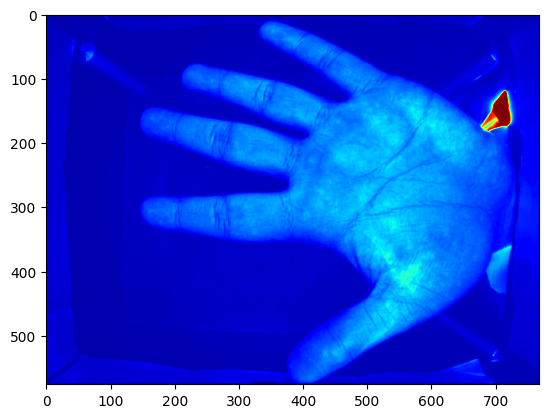

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

img = Image.open(TFM_PATH + "datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_460_01.jpg")
plt.imshow(img,cmap='jet')

In [7]:
import torch
from torch import nn

m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)
output

tensor([[-1.0344, -2.6612, -0.3440,  ..., -2.0891, -2.6158,  0.7105],
        [ 1.2317,  0.9374,  2.8283,  ..., -0.0534,  0.4152,  3.0552],
        [-4.4767,  2.8538, -4.3570,  ...,  2.4149,  3.7493,  1.4981],
        ...,
        [ 3.7940,  4.2568,  5.3111,  ..., -0.0533, -5.1584,  4.1602],
        [-3.2633, -1.4995,  2.8974,  ...,  0.9351,  3.5579, -0.6322],
        [-0.9701, -2.3930,  2.7749,  ..., -0.7315, -2.0830,  4.4572]],
       grad_fn=<AddBackward0>)

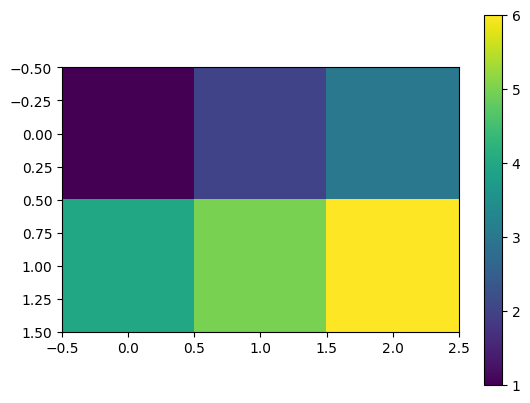

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Crear un tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Convertir a NumPy
numpy_array = tensor.numpy()

# Visualizar usando Matplotlib
plt.imshow(numpy_array, cmap='viridis')
plt.colorbar()
plt.show()

In [9]:
import matplotlib.pyplot as plt
def show_images(images) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.title(images[i].get('title'))
        plt.imshow(images[i].get('data'))

    plt.show(block=True)


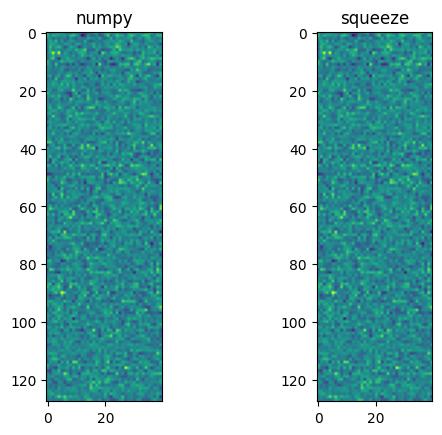

In [10]:
import torch
from torch import nn

m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)

out_img = output.detach().numpy()
out_img_arr = np.squeeze(out_img)

show_images(
    [
        {"title": "numpy", "data": out_img},
        {"title": "squeeze", "data": out_img_arr},
    ]
)

/home/amachuca/PycharmProjects/TFM_SAI/.venv/lib/python3.11/site-packages/torchshow/visualization.py:388: UserWarning: Original input range is not 0-1 when using grayscale mode. Auto-rescaling it to 0-1 by default.
  warnings.warn('Original input range is not 0-1 when using grayscale mode. Auto-rescaling it to 0-1 by default.')


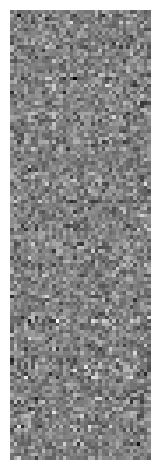

In [3]:
import torchshow as ts
import torch
from torch import nn

m = nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)
output = m(input1, input2)

ts.set_color_mode('rgb')
ts.show(output)